In [6]:
import numpy as np
import pickle as pkl
from pprint import pprint
import os
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
plt.ion()

ModuleNotFoundError: No module named 'numpy'

In [2]:
dr='/Users/tianyichen/Desktop/Research /PhDresearch/Hopkins_Organoid/ecr_ss_20240116/preliminary_ephys_data_ecr_results/chemical_and_electrical_stimulation'
os.chdir(dr)

In [3]:
filenames=os.listdir(dr)

In [4]:
filenames
m=len(filenames)

In [5]:
d=list()
for i in range(0,len(filenames)):
    time=filenames[i].split('_')[0]
    di=datetime.strptime(time, '%y%m%d')
    d.append(di)

In [6]:
np.sort(d) #6 unique time points in total 

array([datetime.datetime(2022, 12, 15, 0, 0),
       datetime.datetime(2022, 12, 18, 0, 0),
       datetime.datetime(2022, 12, 18, 0, 0),
       datetime.datetime(2022, 12, 20, 0, 0),
       datetime.datetime(2023, 1, 10, 0, 0),
       datetime.datetime(2023, 1, 12, 0, 0),
       datetime.datetime(2023, 1, 12, 0, 0),
       datetime.datetime(2023, 1, 12, 0, 0),
       datetime.datetime(2023, 1, 26, 0, 0),
       datetime.datetime(2023, 1, 26, 0, 0)], dtype=object)

In [7]:
sort_filename=np.empty([len(filenames), 4], dtype=object)
sort_filename[:,0]=d
sort_filename[:,1]=filenames
sort_filename=sort_filename[np.argsort(sort_filename[:,0]),:]

In [8]:
def filter_matrix(src_filename, well, win):
    # Load data from the specified source file
    with open(src_filename, 'rb') as f:
        data = pkl.load(f)

    # Extract necessary data from the loaded data structure
    adj_matrix = data[well][win]['adj_matrix_predicted']
    votes = data[well][win]['votes']  # This variable is loaded but not used in the snippet you provided
    corr_peaks = data[well][win]['corr_peaks']
    fs = data['config']['data']['fs']  # Sampling frequency

    # Initialize a matrix to track synchronization based on correlation peaks
    synced_matrix = np.full(adj_matrix.shape, False)
    for key in corr_peaks.keys():
        if np.all(np.abs(np.array(corr_peaks[key]['delays'])) < 1/fs):
            synced_matrix[key[0], key[1]] = True
            synced_matrix[key[1], key[0]] = True

    # Create the filtered matrix as per the given logic
    filtered_matrix = np.logical_and(adj_matrix, np.logical_not(synced_matrix))

    return filtered_matrix

In [9]:
well_choosen='well005' #well 0/1/2 can't run through filter_matrix function since they don't have votes 
all_adj = [filter_matrix(sort_filename[i, 1], well_choosen, 'win_0') for i in range(m)]

In [10]:
for i in range(0,m):
    mat_data = all_adj[i]
    sort_filename[i,2]=(mat_data.shape[0])
    sort_filename[i,3]=(sum(sum(mat_data>0)))

In [11]:
sort_filename[:,[1,2,3]]

array([['221215_CHD8Samples_DA_20240113_16h06m.pkl', 760, 58],
       ['221218_CHD8Samples_Network_Baseline_b4_Chemicals_DA_20240113_16h06m.pkl',
        223, 10],
       ['221218_CHD8Samples_4AP_and_BiccExposure_DA_20240113_16h06m.pkl',
        253, 67],
       ['221220_CHD8Samples_4AP_and_BiccExposure_2DaysAfter_DA_20240113_16h06m.pkl',
        330, 72],
       ['230110_CHD8Samples_4AP_and_BiccExposure_3weeksAfter_DA_20240113_16h06m.pkl',
        1001, 89649],
       ['230112_CHD8Samples_4AP_and_BiccExposure_3weeksAfter_Post_HFStimulation_DA_20240113_16h06m.pkl',
        1015, 114784],
       ['230112_CHD8Samples_4AP_and_BiccExposure_3weeksAfter_DA_20240113_16h06m.pkl',
        1019, 130887],
       ['230112_CHD8Samples_4AP_and_BiccExposure_3weeksAfter_HFStimulation_DA_20240113_16h06m.pkl',
        1019, 2718],
       ['230126_CHD8Samples_4AP_and_BiccExposure_6weeksAfter_HF_and_LWStimulation_DA_20240113_16h06m.pkl',
        1020, 11],
       ['230126_CHD8Samples_4AP_and_BiccExposure_

In [67]:
sort_filename[[5,6],]

array([[datetime.datetime(2023, 1, 12, 0, 0),
        '230112_CHD8Samples_4AP_and_BiccExposure_3weeksAfter_Post_HFStimulation_DA_20240113_16h06m.pkl',
        1015, 114784],
       [datetime.datetime(2023, 1, 12, 0, 0),
        '230112_CHD8Samples_4AP_and_BiccExposure_3weeksAfter_DA_20240113_16h06m.pkl',
        1019, 130887]], dtype=object)

In [73]:
all_adj[5].shape[0]

1015

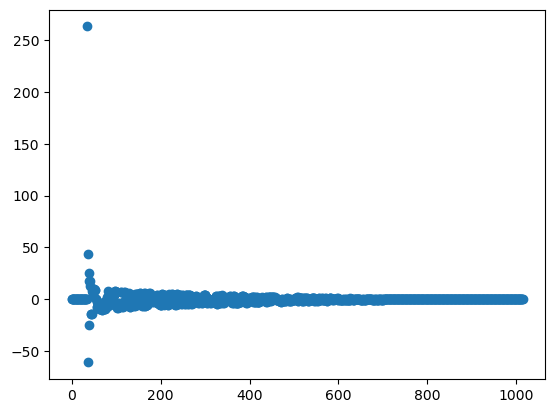

In [84]:
s,u=np.linalg.eig(all_adj[5])
plt.scatter(range(all_adj[5].shape[0]),s)

In [88]:
s,u=np.linalg.eig(all_adj[5])

NameError: name 'sort' is not defined

In [79]:
s[0:10]

array([264.99229758,  63.54446214,  47.76699223,  34.16528046,
        31.32745876,  29.17768009,  27.52475949,  25.82734335,
        25.28278379,  24.46069817])

In [68]:
import csv

In [70]:
def save_matrix_to_csv(matrix, filename):
    with open(f'{filename}.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(matrix)

# Save each matrix to a separate CSV file
save_matrix_to_csv(all_adj[5], '230112_well05_Post_HFStimulatio')
save_matrix_to_csv(all_adj[6], '230112_well05_Baseline')

In [12]:
## choose the time stamps for further analysis
tm=[4,6,9]
m=len(tm)

In [61]:
sort_filename[tm,:]
#sort_filename[tm, :][:, [2, 3]]

array([[datetime.datetime(2023, 1, 10, 0, 0),
        '230110_CHD8Samples_4AP_and_BiccExposure_3weeksAfter_DA_20240113_16h06m.pkl',
        1001, 89649],
       [datetime.datetime(2023, 1, 12, 0, 0),
        '230112_CHD8Samples_4AP_and_BiccExposure_3weeksAfter_DA_20240113_16h06m.pkl',
        1019, 130887],
       [datetime.datetime(2023, 1, 26, 0, 0),
        '230126_CHD8Samples_4AP_and_BiccExposure_6weeksAfter_DA_20240113_16h06m.pkl',
        1018, 110258]], dtype=object)

In [14]:
## add zeros to the adj mat such that they have the same dims 
dim = max(sort_filename[tm, 2])  # Max number of vertices to determine dimension
adj_aug = np.zeros((m, dim, dim))  # Pre-allocate a zero matrix of the desired size

for i in range(m):
    ma = all_adj[tm[i]]  
    l = ma.shape[0]  
    adj_aug[i, :l, :l] = ma 


In [15]:
from scipy.optimize import quadratic_assignment
from numpy import linalg as LA
adj_gm=np.zeros([m,dim,dim])
adj_gm[0]=adj_aug[0] ## use the first graph as baseline

In [16]:
print(f"number of vertices: {dim}")

number of vertices: 1019


In [29]:
sum(sum(abs(adj_aug[0]-adj_aug[0].T)))

49194.0

In [18]:
for i in range(1, m):
    res = quadratic_assignment(adj_gm[i-1],adj_aug[i],options = {'maximize': True})
    perm = res['col_ind']
    adj_gm[i]=adj_aug[i][perm][:,perm]
    before_norm = LA.norm(adj_aug[i] - adj_gm[i-1], 'fro')
    after_norm = LA.norm(adj_gm[i] - adj_gm[i-1], 'fro')

     # Printing the before and after norms to see the difference
    print(f"Frob diff before GM: {before_norm}, After GM: {after_norm}")


Frob diff before GM: 442.28497600529005, After GM: 263.9242315514057
Frob diff before GM: 459.54216346272295, After GM: 300.8504611929322


In [28]:
sum(sum(abs(adj_gm[0]-adj_gm[0].T)))

49194.0

In [20]:
## find largest common connected component 
prod=adj_gm[0]
for i in range(1,m):
    prod=prod * adj_gm[i]

In [21]:
from graspologic.datasets import load_drosophila_right
from graspologic.plot import heatmap
from graspologic.utils import binarize, symmetrize
import graspologic.utils as graspologic_utils

In [22]:
## find the connected component for the common edge subgraph 
[a,ind]=graspologic_utils.largest_connected_component(prod,return_inds=True)
len(ind)

692

In [31]:
n=len(ind)

In [32]:
# double check every adj mat is connected 
glist=np.zeros([m,len(ind),len(ind)])
for i in range(m):
    glist[i]=adj_gm[i][ind][:,ind]
    print(graspologic_utils.is_fully_connected(glist[i]))

True
True
True


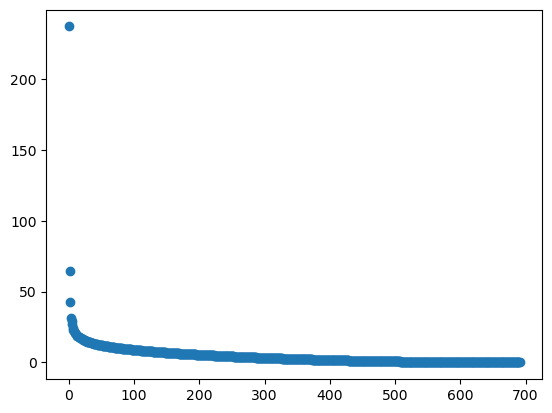

In [33]:
## scree plot for one graph 
u,s,v=np.linalg.svd(glist[0], full_matrices=True)
plt.scatter(range(n),s)

In [35]:
from graspologic.embed import AdjacencySpectralEmbed

In [36]:
ed=1
Xhat_list=np.zeros([len(tm),n,2*ed])
for i in range(len(tm)):
    ase = AdjacencySpectralEmbed(n_components=ed)
    Xhat, Yhat = ase.fit_transform(glist[i])
    Xhat_list[i][:,list(np.arange(ed))]=Xhat
    Xhat_list[i][:,list(np.arange(ed,2*ed))]=Yhat

In [37]:
from scipy.linalg import orthogonal_procrustes
D=np.zeros([len(tm),len(tm)])

In [38]:
for i in range(len(tm)):
    for j in range(len(tm)):
        R, sca = orthogonal_procrustes(Xhat_list[i] , Xhat_list[j] )
        D[i,j]=LA.norm(Xhat_list[i] @ R -  Xhat_list[j],2)**2/n  

In [39]:
J=np.ones([len(tm),len(tm)])/len(tm)
I=np.eye(len(tm))
P=I-J

Text(0, 0.5, 'eigen value')

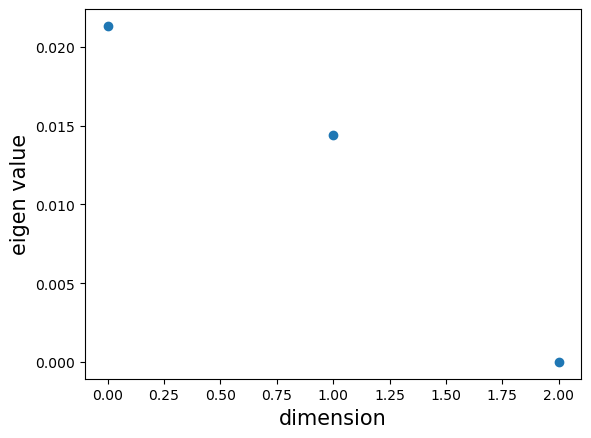

In [40]:
H=(-1/2)*P@D@P
w,v=LA.eig(H)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
plt.scatter(range(len(tm)),w) 
#plt.title('scree plot for MDS')
plt.xlabel('dimension',fontsize=15)
plt.ylabel('eigen value',fontsize=15)

In [41]:
d=2
MDS=v[:,:d] @ np.diag(np.sqrt(w[:d]))

In [56]:
## transform date to days from begining
day=np.zeros([len(tm)])
for i in range(len(tm)):
    day[i]=(sort_filename[tm[i],0]-sort_filename[tm[0],0]).days

Text(0, 0.5, 'dim 2')

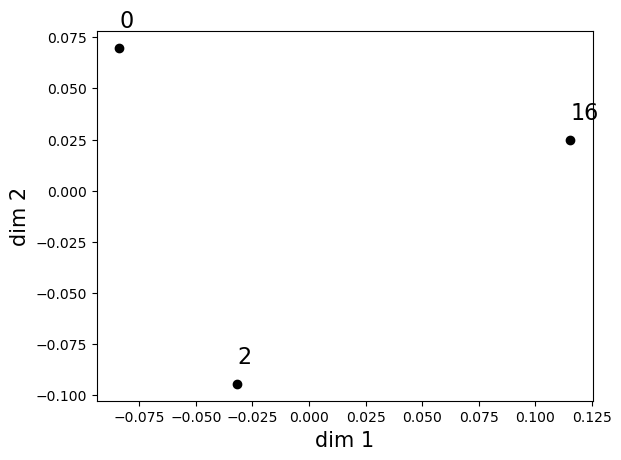

In [60]:
plt.scatter(MDS[:,0],MDS[:,1],color='black')
for i in range(len(tm)):
    plt.text(MDS[i,0],MDS[i,1]+0.01,str(int(day[i])), fontsize=16)
plt.xlabel("dim 1",fontsize=15)
plt.ylabel("dim 2",fontsize=15)